In [1]:
# Import pandas and numpy

import numpy as np 
import pandas as pd

# Import matplotlib and seaborn for plotting and to specify that graphs should be plotted inline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import libraries to generate models
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Type it in the first cell of your notebook, then your matplotlib plots will be included next to your codes. 
# Otherwise, include plt.show()

pd.set_option('display.max_rows', None)

In [2]:
# Read the csv file to store it under the name df

df=pd.read_csv("online_shoppers_intention.csv")

In [3]:
# Data Preprocessing

print(df.shape)
print(df.describe())
print(df.info())
df.head()

(12330, 18)
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
# Function to plot Stacked bar plot of a feature with conversion rate/ success rate on secondary Y axis

def get_revenue_proportion_plot(col_name):
    df_viz = df.copy()
    if col_name == 'Month':
        months = ["Jan", "Feb", "Mar", "Apr", "May", "June", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
        df_viz['Month'] = pd.Categorical(df_viz['Month'], categories=months, ordered=True)
    
    revenue_proportion = df_viz.groupby(col_name,as_index=True)['Revenue'].mean()
    revenue = pd.crosstab(df_viz[col_name],df_viz['Revenue'])
    revenue = pd.concat([revenue, revenue_proportion], axis=1)
    revenue[col_name] = revenue.index
    revenue = revenue.reset_index(drop=True)
    revenue.columns = ['False', 'True', 'Revenue', col_name]
    ax = revenue.plot(x=col_name,kind="bar", y=['False', 'True'], stacked=True, rot=0, ylabel="Traffic Count")
    ax2 = ax.twinx()
    revenue['Revenue'].plot(ax=ax2, color='k', marker='o')
    ax2.set_ylabel('Conversion Rate')
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in revenue['Revenue']])
    ax2.hlines(y=revenue['Revenue'].mean(), xmin=0, xmax = 20, linewidth=2, color='r',linestyles='--')
    

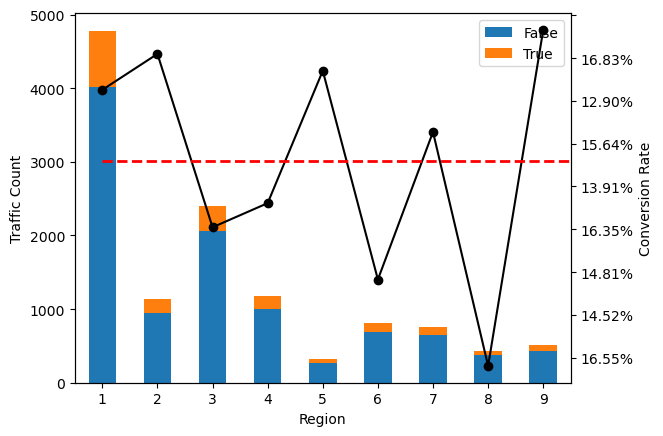

In [6]:
# Region analysis
get_revenue_proportion_plot('Region')

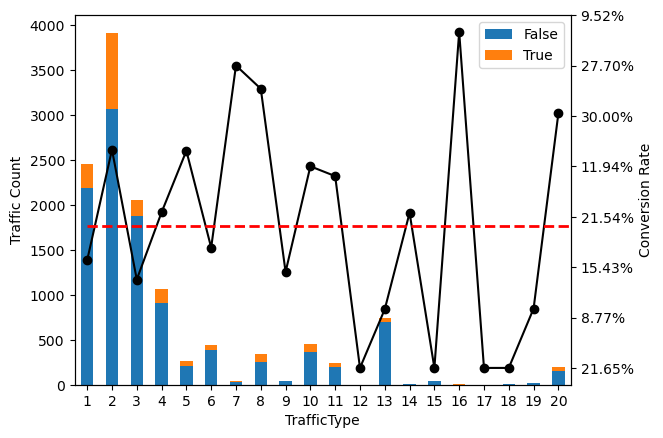

In [7]:
# TrafficType

get_revenue_proportion_plot('TrafficType')

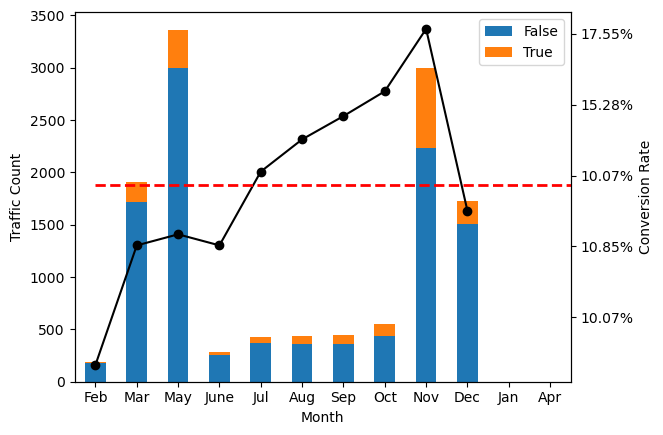

In [8]:
# Revenue analysis for each month
get_revenue_proportion_plot('Month')

In [9]:
df['Month'].unique()


array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

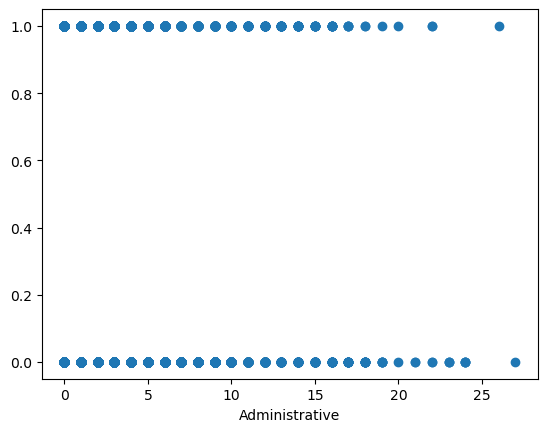

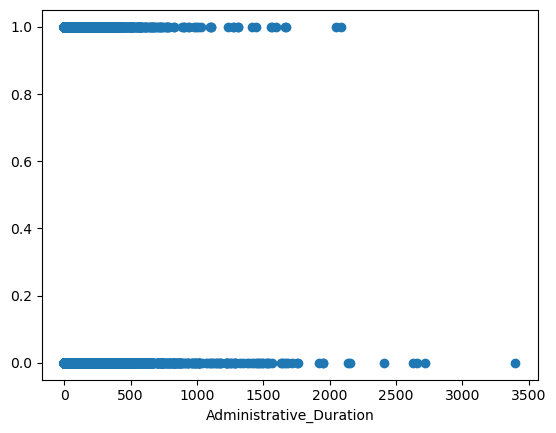

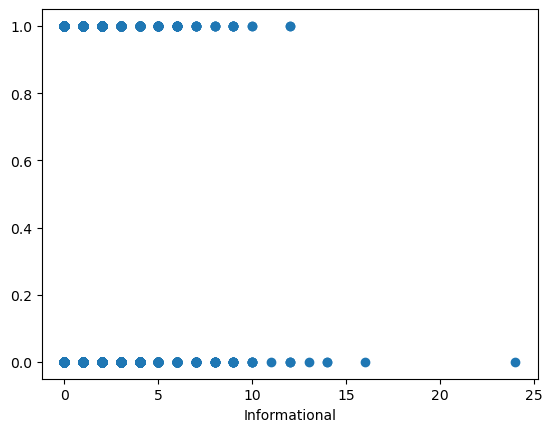

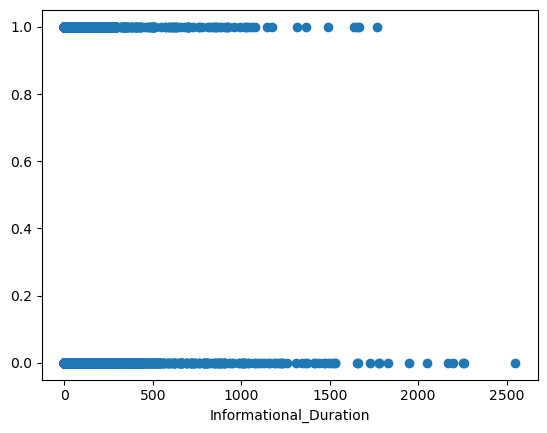

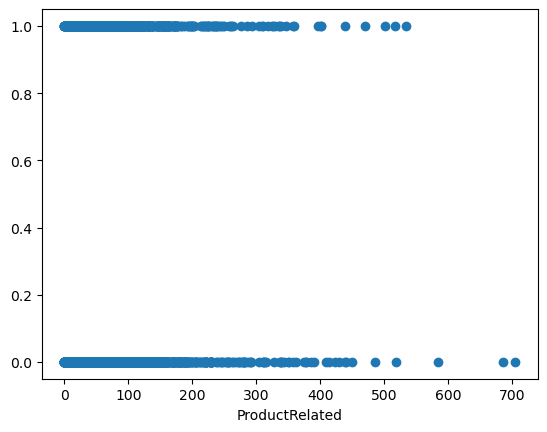

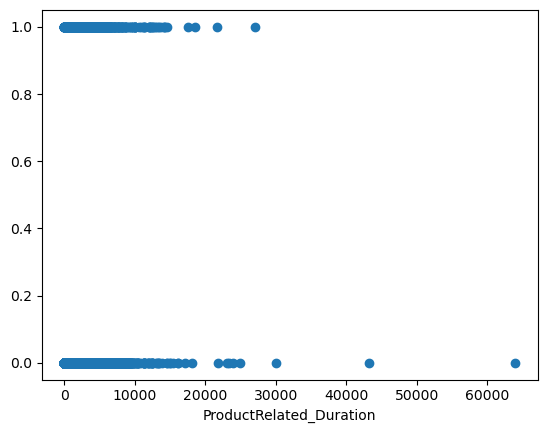

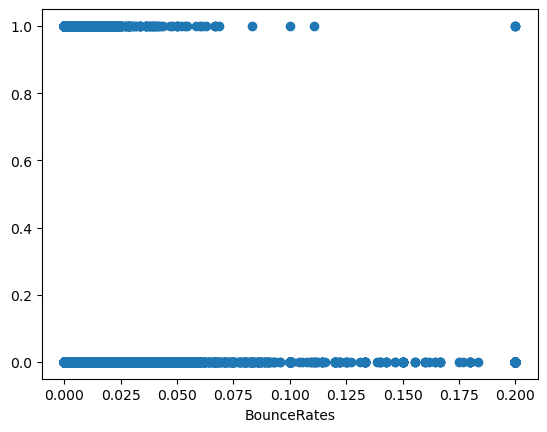

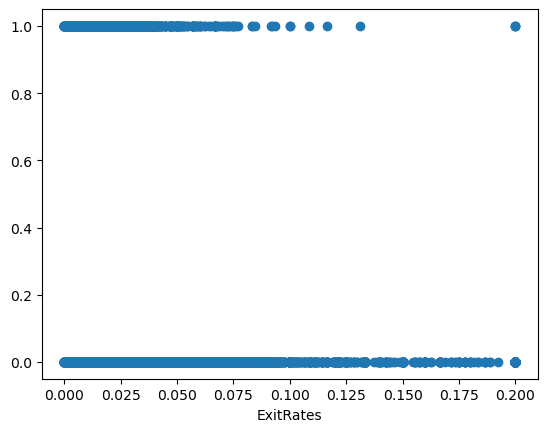

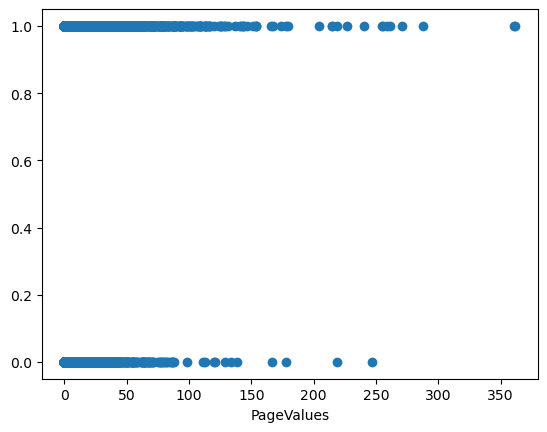

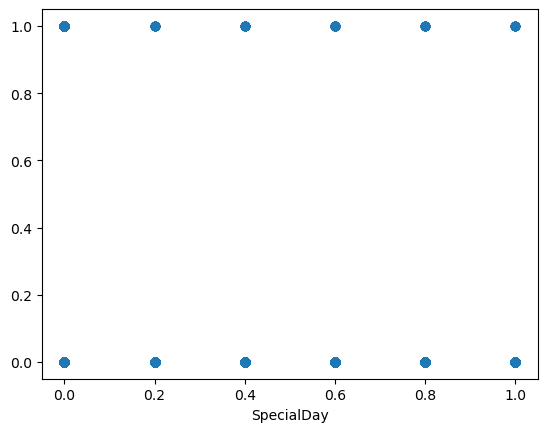

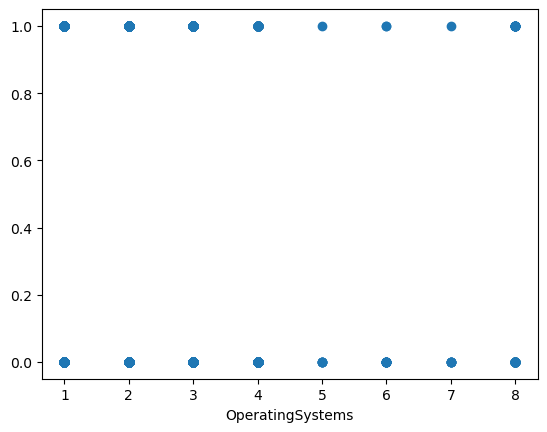

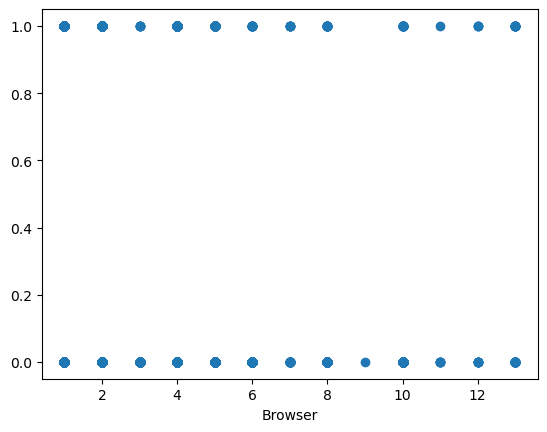

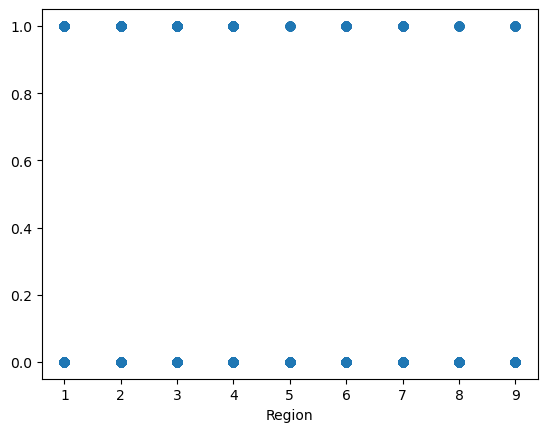

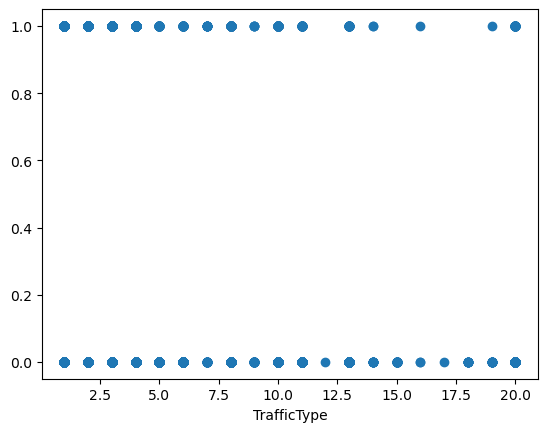

In [10]:
def continuous_cat(cont_col, cat_col = 'Revenue'):
    plt.scatter(x=df[cont_col], y=df[cat_col])
    plt.xlabel(c)
    plt.show()

for c in df.columns:
    if df[c].dtype==np.int64 or df[c].dtype==np.float64:
        continuous_cat(c, cat_col = 'Revenue')
        


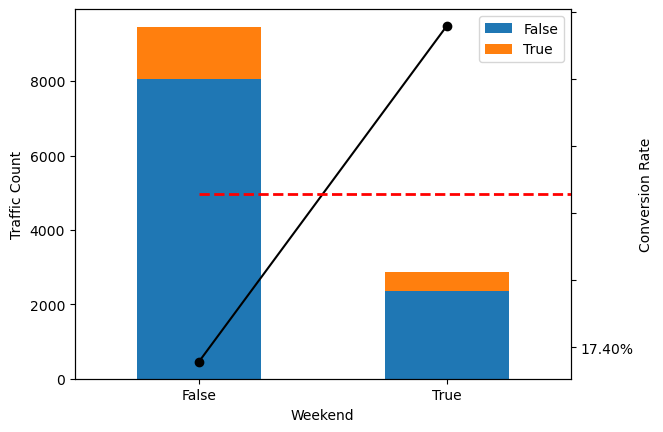

In [11]:
# Revenue analysis over weekend
get_revenue_proportion_plot("Weekend")

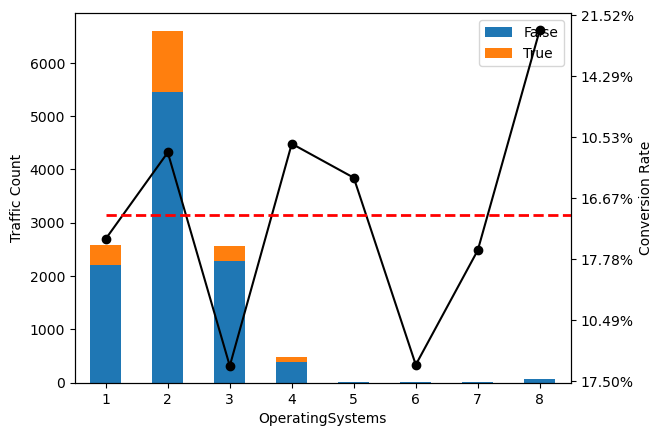

In [12]:
# # Revenue analysis over operating System
get_revenue_proportion_plot('OperatingSystems')

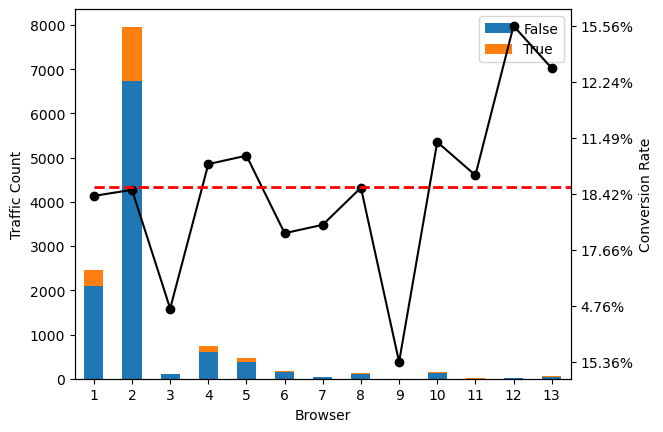

In [13]:
# # Revenue analysis based on browser types
get_revenue_proportion_plot('Browser')

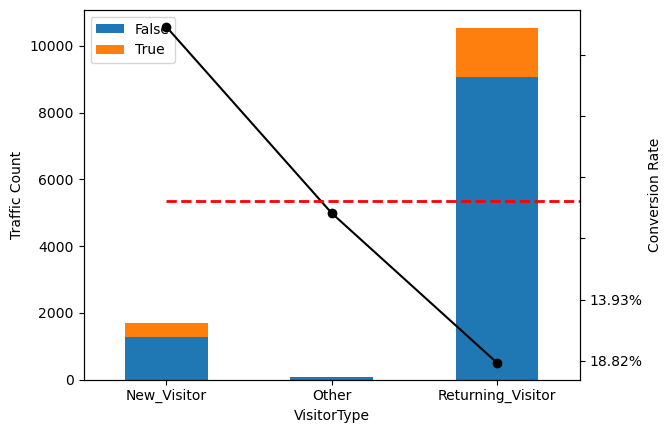

In [14]:
# # Revenue analysis based on different visitor type
get_revenue_proportion_plot("VisitorType")

In [15]:
# Transform the data type of below mentioned features to object

df["OperatingSystems"] = df["OperatingSystems"].astype(object)
df["Browser"] = df["Browser"].astype(object)
df["Region"] = df["Region"].astype(object)
df["TrafficType"] = df["TrafficType"].astype(object)



#Remove columns
columns_to_remove = ['BounceRates','Administrative', 'Administrative_Duration', 'Informational','Informational_Duration','PageValues','SpecialDay','ProductRelated_Duration']  # Specifying columns to remove
df = df.drop(columns=columns_to_remove)

In [16]:
# Set target variable
y=df['Revenue']

# Transform the categorical variables into dummies or indicator variables

data = pd.get_dummies(df)
x_data=data.drop(['Revenue'], axis = 1)

# Split the data

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)

# verify the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)


Shape of x_train : (8631, 66)
Shape of y_train : (8631,)
Shape of x_test : (3699, 66)
Shape of y_test : (3699,)


In [17]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProductRelated                 12330 non-null  int64  
 1   ExitRates                      12330 non-null  float64
 2   Weekend                        12330 non-null  bool   
 3   Month_Aug                      12330 non-null  bool   
 4   Month_Dec                      12330 non-null  bool   
 5   Month_Feb                      12330 non-null  bool   
 6   Month_Jul                      12330 non-null  bool   
 7   Month_June                     12330 non-null  bool   
 8   Month_Mar                      12330 non-null  bool   
 9   Month_May                      12330 non-null  bool   
 10  Month_Nov                      12330 non-null  bool   
 11  Month_Oct                      12330 non-null  bool   
 12  Month_Sep                      12330 non-null 

In [18]:
#Feature Selection
from sklearn.feature_selection import chi2

chi2_stats, p_values = chi2(x_data, y)

In [19]:
x_data.columns[p_values<0.05]

Index(['ProductRelated', 'ExitRates', 'Weekend', 'Month_Dec', 'Month_Feb',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_2', 'OperatingSystems_3', 'Browser_3',
       'Browser_13', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_10', 'TrafficType_13', 'TrafficType_15', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [20]:
p_values[0]

0.0

In [21]:
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)
 
# Resample the training data
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
 
# Check the shape of the resampled train data
print("Shape of resampled dataset:", x_train_resampled.shape, y_train_resampled.shape)
print("Shape of x_train_resampled:", x_train_resampled.shape)

Shape of resampled dataset: (14690, 66) (14690,)
Shape of x_train_resampled: (14690, 66)


In [22]:
# Logistic Regression
# Define function
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)

# Train the classifier
logreg.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_logreg=logreg.predict(x_test)
pred_prob1 = logreg.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of logistic regression classifier on train set: ', logreg.score(x_train_resampled, y_train_resampled))
print('Accuracy of logistic regression classifier on test set: ', logreg.score(x_test, y_test))
print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob1))
print("f1_score:",f1_score(y_test, y_pred_logreg))


Accuracy of logistic regression classifier on train set:  0.6878829135466303
Accuracy of logistic regression classifier on test set:  0.6461205731278724
AUC for logistic regression: 0.7431647207212102
f1_score: 0.40036646816307836


In [23]:
print(logreg.coef_)
print(logreg.intercept_)


[[ 4.82231833e-03 -1.63960922e+01  2.40365698e-02  3.45698228e-01
  -1.56031030e-01 -1.22966317e+00  4.16309137e-01 -2.32671298e-01
  -3.86484139e-01 -7.54578462e-02  6.76613310e-01  3.71648941e-01
   3.28334072e-01 -1.72639581e-02  1.83898022e-01 -2.06670458e-01
   1.95353618e-01 -7.86148793e-01  2.97372790e-01  4.60747724e-01
  -6.89927354e-02 -1.57202271e-02 -6.04053805e-02 -5.51124596e-01
   4.91113375e-02  5.01280635e-02 -3.88133233e-01 -3.04387907e-01
  -5.28582965e-02 -1.15860870e-01  4.31973552e-01 -7.86148793e-01
   1.05292093e+00  7.48801627e-01  8.84111243e-02  1.76644671e-01
  -4.75410114e-03  1.37105230e-01 -5.06047142e-02 -2.01678568e-01
   1.16943100e-01 -4.15958915e-02 -1.62174640e-01 -9.26474971e-02
   2.32457837e-01 -2.37882623e-01  2.39879581e-01  3.76838852e-01
  -1.40051160e-01  5.32579605e-01  5.84894629e-01  3.01905903e-01
   3.21044256e-01  3.49312226e-01 -1.30552014e-01 -6.14380523e-01
  -8.99099435e-03 -1.74391356e+00  1.00613061e+00 -1.35392216e-01
  -1.10919

In [24]:
exp_coeffs = np.exp(logreg.coef_)

# Get the column names of the DataFrame used for training
feature_names = df.columns

# Print the variable names along with the exponentiated coefficients
for coef, feature_name in zip(exp_coeffs[0], feature_names):
    print(f"{feature_name}: {coef}")
    
    

ProductRelated: 1.0048339644239552
ExitRates: 7.572994110788628e-08
Month: 1.0243277766490562
OperatingSystems: 1.4129761553564837
Browser: 0.8555326428596856
Region: 0.29239104828379736
TrafficType: 1.5163545579217037
VisitorType: 0.7924139991740238
Weekend: 0.6794415022012521
Revenue: 0.9273188197214643


In [25]:
# Evaluate confusion matrix
my_matrix_logreg = confusion_matrix(y_test, y_pred_logreg) 
print("TP is:", my_matrix_logreg[1,1])
print("TN is:", my_matrix_logreg[0,0])
print("FP is:", my_matrix_logreg[0,1])
print("FN is:", my_matrix_logreg[1,0])

TP is: 437
TN is: 1953
FP is: 1124
FN is: 185


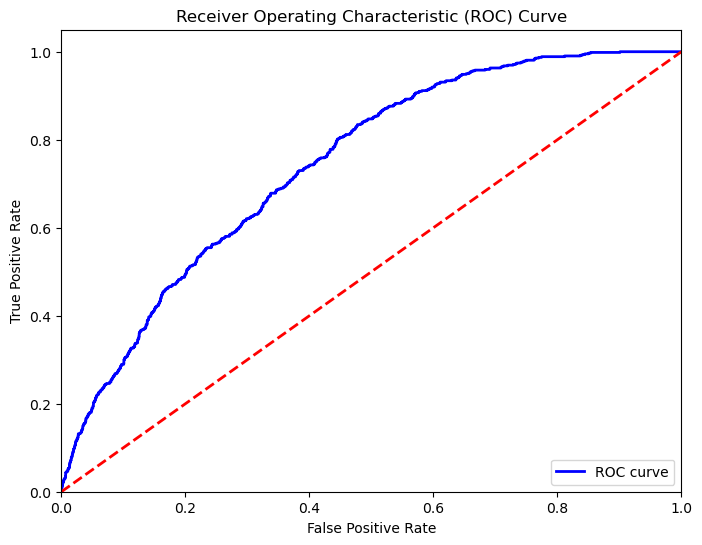

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [27]:
# Decision Tree
# Define function
opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# Go through all possible combinations: 9*9*9 models, with 5 fold cv??
# Define parameters
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), 
             'max_leaf_nodes':    range(2,10)   }

# Create function with gridsearch and cross validation
grid_tree = GridSearchCV(opt_tree, dt_params, scoring = 'roc_auc')

# Train classifier
grid_tree.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_dt = grid_tree.predict(x_test)
pred_prob3 = grid_tree.predict_proba(x_test)[:,1]
f1 = f1_score(y_test, y_pred_dt)
# Print train, test accuarcay and area under the curve score
print('Accuracy of Decision Tree classifier on train set: ', grid_tree.score(x_train_resampled,y_train_resampled))
print('Accuracy of Decision Tree classifier on test set: ', grid_tree.score(x_test, y_test))
print("AUC for Decision Tree:", roc_auc_score(y_test, pred_prob3))
print("Accuracy:", grid_tree.best_score_) #mean validation accuracy
print(grid_tree.best_params_)
print("f1 score:", f1)




Accuracy of Decision Tree classifier on train set:  0.7470122119908562
Accuracy of Decision Tree classifier on test set:  0.7275745156210323
AUC for Decision Tree: 0.7275745156210323
Accuracy: 0.7429351596252204
{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
f1 score: 0.39342915811088297


In [28]:
# Evaluate confusion matrix
my_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("TP is:", my_matrix_dt[1,1])
print("TN is:", my_matrix_dt[0,0])
print("FP is:", my_matrix_dt[0,1])
print("FN is:", my_matrix_dt[1,0])



TP is: 479
TN is: 1743
FP is: 1334
FN is: 143


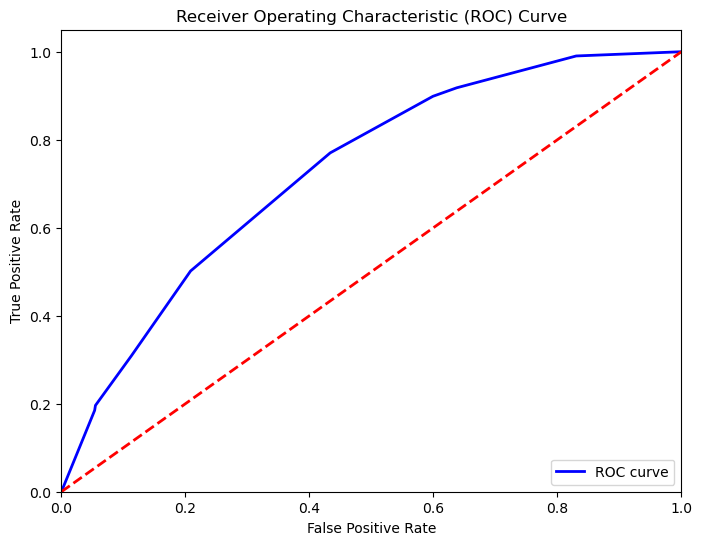

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob3)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [30]:
print(tree.export_text(grid_tree.best_estimator_)) 

|--- feature_1 <= 0.04
|   |--- feature_10 <= 0.50
|   |   |--- feature_1 <= 0.02
|   |   |   |--- feature_0 <= 8.50
|   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |--- class: True
|   |   |   |   |--- feature_1 >  0.00
|   |   |   |   |   |--- class: False
|   |   |   |--- feature_0 >  8.50
|   |   |   |   |--- feature_65 <= 0.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- feature_65 >  0.50
|   |   |   |   |   |--- class: True
|   |   |--- feature_1 >  0.02
|   |   |   |--- class: False
|   |--- feature_10 >  0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: True
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: True
|--- feature_1 >  0.04
|   |--- feature_1 <= 0.08
|   |   |--- class: False
|   |--- feature_1 >  0.08
|   |   |--- class: False



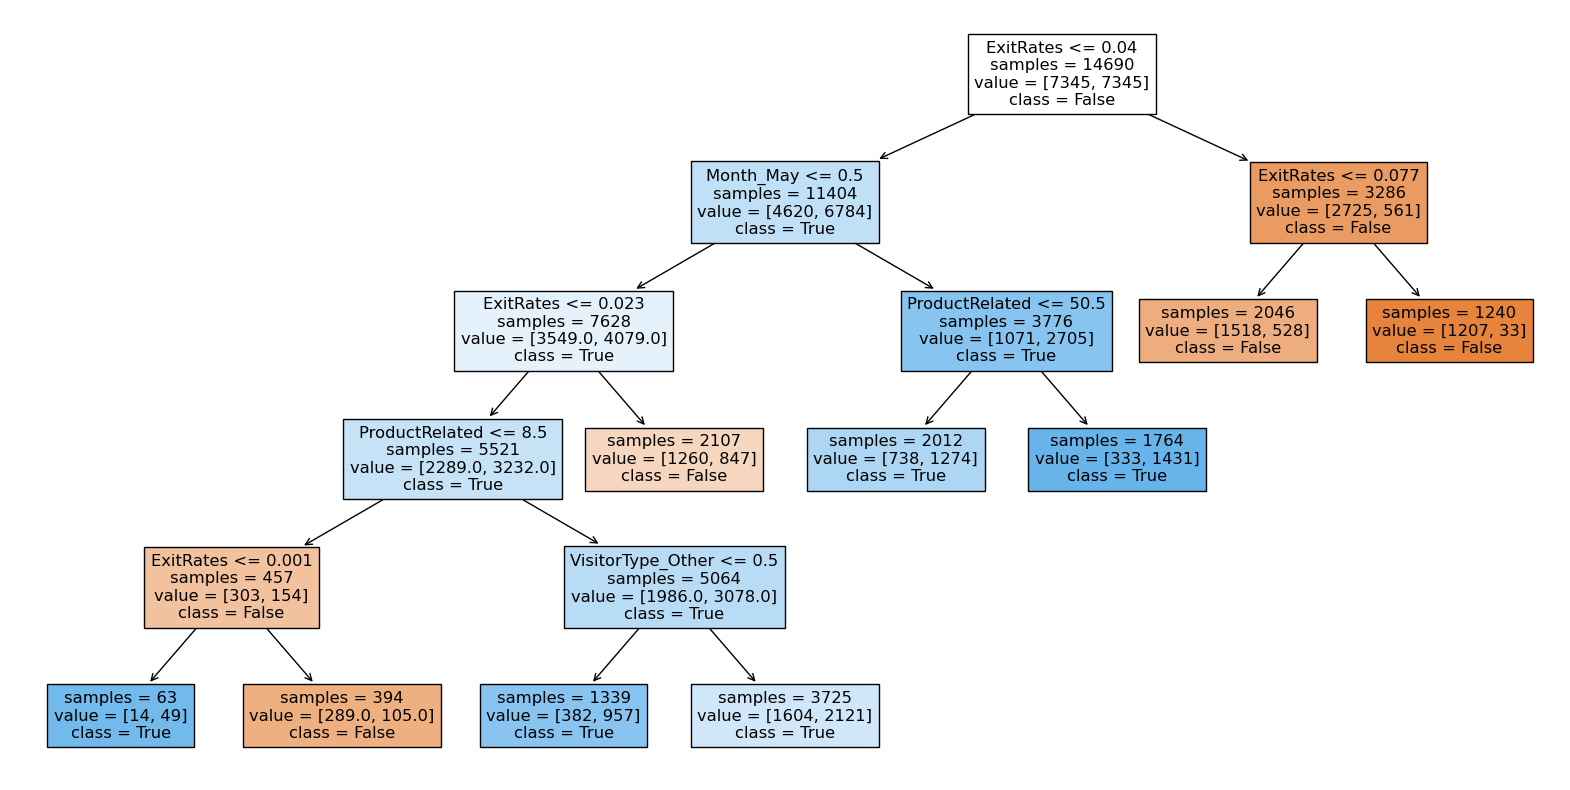

In [31]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 
class_names = df['Revenue'].astype(str).unique().tolist()
tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = data.columns.tolist(), # specify variable names 
               class_names = class_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read # impurity = False means we don't need the IG or Gini
plt.show()


In [32]:
# Random Forest

rf = RandomForestClassifier(bootstrap=True, random_state = 42) 
dt_params_3 = {'n_estimators':np.arange(100,800,100),'max_samples':np.arange(100,800,100)}
grid_rf_tree = GridSearchCV(rf, dt_params_3,cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_tree.fit(x_train_resampled, y_train_resampled)
# estimator dropped, estimator will be tree
y_pred_rf = grid_rf_tree.predict(x_test)
f1 = f1_score(y_test, y_pred_rf)
print('Accuracy of random forest classifier on train set: ', grid_rf_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of random forest classifier on test set: ', grid_rf_tree.score(x_test, y_test))
pred_prob4 = grid_rf_tree.predict_proba(x_test)[:,1]
print("AUC for random forest classifier:", roc_auc_score(y_test, pred_prob4))
print("F1 Score:", f1)


Accuracy of random forest classifier on train set:  0.9094233769748388
Accuracy of random forest classifier on test set:  0.7531125025732878
AUC for random forest classifier: 0.7531125025732878
F1 Score: 0.4146100691016782


In [34]:
my_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("TP is:", my_matrix_rf[1,1])
print("TN is:", my_matrix_rf[0,0])
print("FP is:", my_matrix_rf[0,1])
print("FN is:", my_matrix_rf[1,0])



TP is: 420
TN is: 2093
FP is: 984
FN is: 202


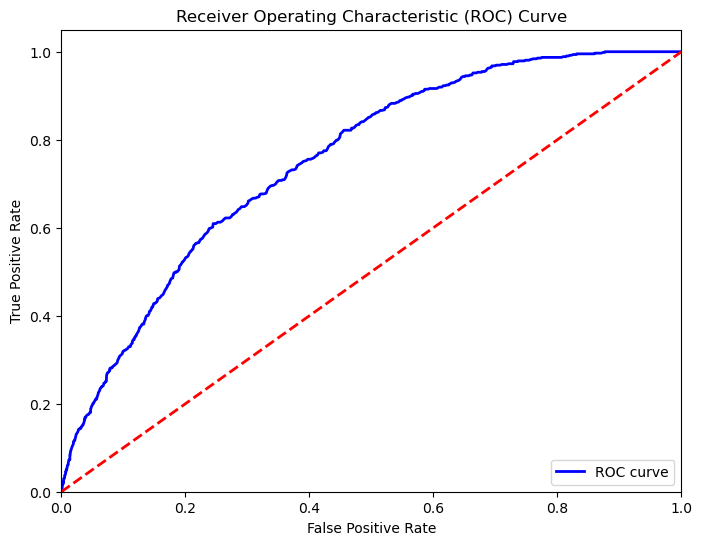

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob4)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [36]:
# Adaboost Ensemble Classifier 

dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt_params2 = {'learning_rate':  np.arange(0,1.1,0.1)}
adaboost = AdaBoostClassifier(dt1, n_estimators = 500, random_state = 42)
grid_ada_tree = GridSearchCV(adaboost, dt_params2,cv=5,n_jobs=2)
grid_ada_tree.fit(x_train_resampled, y_train_resampled)


y_pred_ada=grid_ada_tree.predict(x_test)
pred_prob5 = grid_ada_tree.predict_proba(x_test)[:,1]
f1 = f1_score(y_test, y_pred_ada)




# Print train, test accuracy and area under the curve score

print('Accuracy of adaboost classifier on train set: ', grid_ada_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of adaboost classifier on test set: ', grid_ada_tree.best_estimator_.score(x_test, y_test))
print("AUC for Adaboost:", roc_auc_score(y_test, pred_prob5))
print("F1 Score:", f1)
print("Best learning rate:", grid_ada_tree.best_params_)



/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Accuracy of adaboost classifier on train set:  0.7104152484683458
Accuracy of adaboost classifier on test set:  0.6463909164639091
AUC for Adaboost: 0.7425959849396048
F1 Score: 0.40219378427787933
Best learning rate: {'learning_rate': 1.0}


In [37]:
# Evaluate confusion matrix
my_matrix_adaboost = confusion_matrix(y_test, y_pred_ada)
print("TP is:", my_matrix_adaboost[1,1])
print("TN is:", my_matrix_adaboost[0,0])
print("FP is:", my_matrix_adaboost[0,1])
print("FN is:", my_matrix_adaboost[1,0])



TP is: 440
TN is: 1951
FP is: 1126
FN is: 182


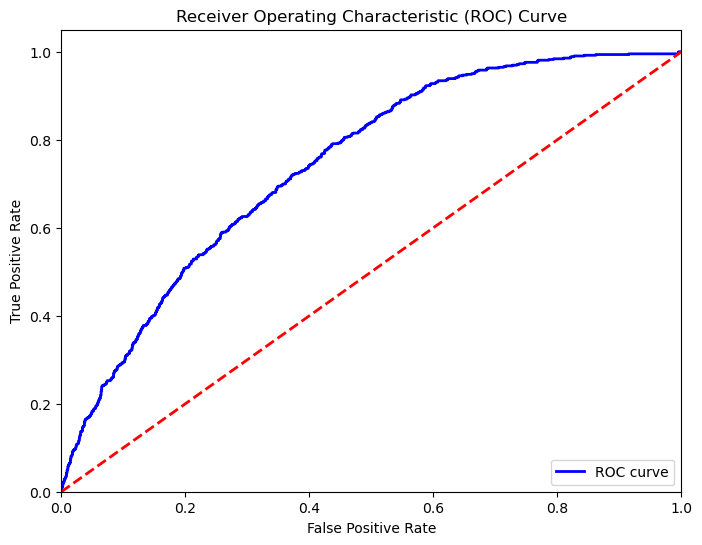

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob5)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(200,100,50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(x_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_mlp = mlp.predict(x_test)
pred_prob6 = mlp.predict_proba(x_test)[:, 1]

# Calculate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_mlp)
auc_score = roc_auc_score(y_test, pred_prob6)
# Calculate F1 score
f1 = f1_score(y_test, y_pred_mlp)

# Print 
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)
print("AUC for nn:", auc_score)




F1 Score: 0.32
Test Accuracy: 0.7426331440929981
AUC for nn: 0.6833845030080035


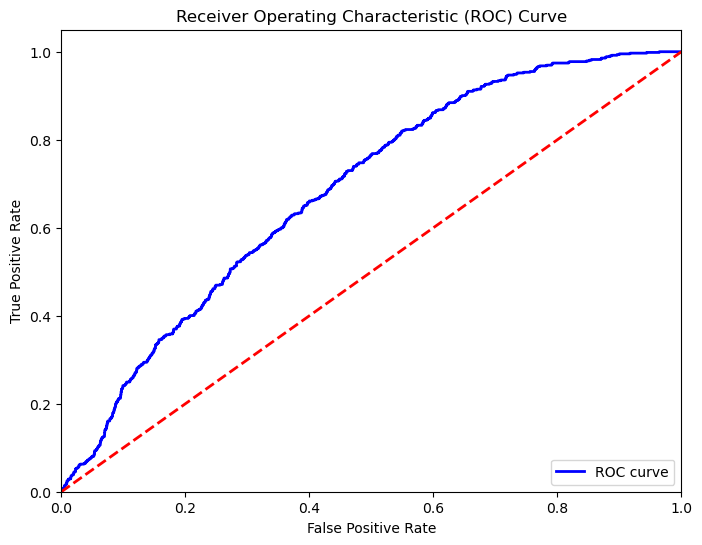

In [40]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, pred_prob6)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [41]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:")
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)




Confusion Matrix:
TP: 224
TN: 2523
FP: 554
FN: 398
